# **TUGAS 7.1 Implementasi Logistic Regression Dengan SVD**

Nama : Zainal Arifin

Nim : 220411100103

Link Git : https://github.com/220411100103-Zainal-Arifin/PPW

Link : https://huggingface.co/spaces/leinna/klasifikasi_svd

## Installasi Libray

In [ ]:
!pip install Sastrawi pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import pickle
import nltk
import numpy as np
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from tqdm import tqdm
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Load Data

In [ ]:
file_path = '/content/hasil_crawling.csv'
data = pd.read_csv(file_path)
data

,Title,Date,Content,Category
0,PalmCo Dukung Cyber Education di Sekolah Remot...,Ade Hapsari Lestarini • 11 September 2024 08:59,Jakarta: Sub Holding Perkebunan Nusantara PTPN...,Ekonomi
1,Harga Jual Emas Antam Melesat Rp13 Ribu/Gram,Arif Wicaksono • 11 September 2024 08:55,Jakarta: Harga emas batangan PT Aneka Tambang ...,Ekonomi
2,Terpopuler Ekonomi: Pascamerger Angkasa Pura h...,Ade Hapsari Lestarini • 11 September 2024 08:28,Jakarta: Berita-berita terpopuler ekonomi pada...,Ekonomi
3,Inflasi dan Debat Presiden AS Bikin Harga Emas...,Ade Hapsari Lestarini • 11 September 2024 08:12,Jakarta: Harga emas dunia menguat pada sesi pe...,Ekonomi
4,"Harga Minyak Mentah Brent Terpental ke USD69,1...",Ade Hapsari Lestarini • 11 September 2024 07:57,New York: Harga minyak mentah dunia terpantau ...,Ekonomi
...,...,...,...,...
95,Indonesia Ditunjuk jadi Tuan Rumah World Abili...,Gregorius Gelino • 6 September 2024 12:07,Paris: Menteri Pemuda dan Olahraga Republik In...,Olahraga
96,Menpora Berharap Banyak dengan PON XXI Aceh-Sumut,Gregorius Gelino • 6 September 2024 11:19,Jakarta: Menteri Pemuda dan Olahraga Republik ...,Olahraga
97,IFG Labuan Bajo Marathon 2024 Siapkan Hadiah R...,Gregorius Gelino • 6 September 2024 10:25,Labuan Bajo: Pendaftaran IFG Labuan Bajo Marat...,Olahraga
98,Hasil Pertandingan UEFA Nations League,Alfa Mandalika • 6 September 2024 09:22,Jakarta: Sejumlah negara melakoni laga UEFA Na...,Olahraga


In [ ]:
df_acak = data.sample(frac=1).reset_index(drop=True)

In [ ]:
df_acak

,Title,Date,Content,Category
0,IFG Labuan Bajo Marathon 2024 Siapkan Hadiah R...,Gregorius Gelino • 6 September 2024 10:25,Labuan Bajo: Pendaftaran IFG Labuan Bajo Marat...,Olahraga
1,YCAB Foundation-Juara Capital Indonesia Luncur...,10 September 2024 16:40,Jakarta: YCAB Foundation bersama Juara Capital...,Ekonomi
2,"Gladi Resik Lancar, Menpora Yakin Upacara Pemb...",Gregorius Gelino • 9 September 2024 10:23,Banda Aceh: Untuk memastikan pembukaan PON XXI...,Olahraga
3,Erick Thohir Pastikan Rumput GBK Aman Jelang H...,7 September 2024 19:27,Jakarta: Ketua Umum PSSI Erick Thohir memeriks...,Olahraga
4,Dito Yakin Pembukaan PON XXI Aceh-Sumut akan M...,Gregorius Gelino • 7 September 2024 12:24,Jakarta: Menteri Pemuda dan Olahraga Republik ...,Olahraga
...,...,...,...,...
95,Indonesia Harus Lanjutkan Momentum Lawan Austr...,Gregorius Gelino • 9 September 2024 13:38,Jakarta: Timnas Indonesia akan menghadapi Aust...,Olahraga
96,Literasi Digital Perlu Dikenalkan pada Anak Se...,Husen Miftahudin • 10 September 2024 20:21,Jombang: Etika digital harus diperkenalkan kep...,Ekonomi
97,Mentan Copot Direktur Gegara 'Main' dengan Cal...,Naufal Zuhdi • 10 September 2024 18:01,,Ekonomi
98,Bintang Newcastle Masih Kecewa dengan Southgate,Gregorius Gelino • 7 September 2024 11:10,"Newcastle: Penyerang Newcastle United, Anthony...",Olahraga


In [ ]:
titles = data['Title'] 
contents = data['Content'] 
data['Content'] = titles + " " + contents

## Splitting Data

In [ ]:
X = data['Content'] 
y = data['Category'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing

In [ ]:
def clean_lower(text):
    if isinstance(text, str):
        return text.lower()
    return text

def clean_punct(text):
    if isinstance(text, str):
        clean_patterns = re.compile(r'[0-9]|[/(){}\[\]\|@,;_]|[^a-z ]')
        text = clean_patterns.sub(' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return text

def _normalize_whitespace(text):
    if isinstance(text, str):
        corrected = re.sub(r'\s+', ' ', text)
        return corrected.strip()
    return text

def clean_stopwords(text):
    if isinstance(text, str):
        stopword = set(stopwords.words('indonesian'))
        text = ' '.join(word for word in text.split() if word not in stopword)
        return text.strip()
    return text

def sastrawistemmer(text):
    factory = StemmerFactory()
    st = factory.create_stemmer()
    text = ' '.join(st.stem(word) for word in text.split())
    return text

In [ ]:
X_train = X_train.apply(clean_lower)
X_train = X_train.apply(clean_punct)
X_train = X_train.apply(_normalize_whitespace)
X_train = X_train.apply(clean_stopwords)
X_train = X_train.apply(sastrawistemmer)
X_test = X_test.apply(clean_lower)
X_test = X_test.apply(clean_punct)
X_test = X_test.apply(_normalize_whitespace)
X_test = X_test.apply(clean_stopwords)
X_test = X_test.apply(sastrawistemmer)

In [ ]:
train_df = pd.DataFrame({'stemmed': X_train, 'Category': y_train})
test_df = pd.DataFrame({'stemmed': X_test, 'Category': y_test})

train_df

,stemmed,Category
55,tim panjat tebing putri jatim sabet emas nomor...,Olahraga
88,intip penalti gagal maarten paes baru lawan ar...,Olahraga
26,ekonomi as soft landing chicago ekonomi amerik...,Ekonomi
42,semen hijau ancam ubah iklim dunia jakarta pt ...,Ekonomi
69,pon xxi aceh sumut muncul bakat panjat tebing ...,Olahraga
...,...,...
60,kolaborasi lancar bikin menpora pon xxi aceh s...,Olahraga
71,hummels kes sosok de rossi roma bek as roma ma...,Olahraga
14,tan copot direktur gegara main calo barang jasa,Ekonomi
92,abraham wenas labuh kesatria bengawan solo sol...,Olahraga


In [ ]:
test_df

,stemmed,Category
83,warga aceh antusias saksi tanding basket pon x...,Olahraga
53,shin tae yong hadir sesi latih timnas indonesi...,Olahraga
70,menko pmk pasti presiden hadir buk pon xxi ace...,Olahraga
45,harga emas antam hasil tipis jakarta harga ema...,Ekonomi
44,erick thohir rombak direksi bulog wahyu supary...,Ekonomi
39,dagang emas bursa komoditi pilih masyarakat ja...,Ekonomi
22,bahlil timbang lanjut operasi pltu,Ekonomi
80,timnas indonesia sponsor jakarta extrajoss min...,Olahraga
10,anggota holding pupuk indonesia dorong ekosist...,Ekonomi
0,palmco dukung cyber education sekolah remote a...,Ekonomi


## Pembuatan VSM

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,abadi,abbeele,abdullah,abilitysport,abilitysprot,abraham,absen,acara,aceh,ada,...,york,yose,youth,yunani,yusrizal,za,zeki,zian,zona,zuri
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.176186,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.059791,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.388843,0.045726,...,0.0,0.0,0.0,0.0,0.000000,0.053634,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.05601,0.293105,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
76,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
77,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
78,0.0,0.0,0.0,0.0,0.0,0.528422,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,abadi,abbeele,abdullah,abilitysport,abilitysprot,abraham,absen,acara,aceh,ada,...,york,yose,youth,yunani,yusrizal,za,zeki,zian,zona,zuri
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.376001,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142301,0.372335,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.029647,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.026648,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


## Penerapkan SVD untuk LSA pada data training

In [ ]:
n_components = 100 
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_lsa = svd.fit_transform(X_train_tfidf)

X_test_lsa = svd.transform(X_test_tfidf)

train_lsa_df = pd.DataFrame(X_train_lsa)
train_lsa_df.insert(0, 'Category', y_train.values)

test_lsa_df = pd.DataFrame(X_test_lsa)
test_lsa_df.insert(0, 'Category', y_test.values)

In [ ]:
train_lsa_df

,Category,0,1,2,3,4,5,6,7,8,...,70,71,72,73,74,75,76,77,78,79
0,Olahraga,0.400701,-0.077862,-0.029316,0.056578,-0.246171,-0.315028,0.243916,-0.216382,0.032368,...,0.314498,0.162217,-0.008865,0.282084,-0.083307,0.037410,0.011908,-0.005251,0.032270,0.004303
1,Olahraga,0.143576,0.204212,0.053732,0.262264,-0.121692,0.133844,-0.175461,0.233478,-0.038338,...,0.004277,-0.017828,0.017721,0.012339,0.023690,-0.025048,-0.038147,0.028209,0.004789,-0.000320
2,Ekonomi,0.036433,0.050378,0.212365,-0.121516,-0.008085,0.167583,0.286661,-0.013197,-0.163677,...,0.003188,-0.033219,0.038091,0.002156,-0.013466,0.008152,0.001823,0.018685,-0.012604,0.001692
3,Ekonomi,0.068005,0.036736,0.106974,0.017157,-0.022385,0.022795,-0.020434,-0.020895,0.110428,...,0.014115,-0.008674,0.003002,0.007669,0.004492,-0.008182,0.003028,0.008768,-0.003385,-0.000572
4,Olahraga,0.535662,-0.210607,-0.056649,-0.013659,-0.127089,-0.157167,0.127480,-0.116897,0.113533,...,-0.202626,-0.121578,0.103721,-0.317657,-0.034731,-0.037606,-0.008685,0.027538,-0.043134,-0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Olahraga,0.666514,-0.290415,-0.076043,-0.120363,0.150540,0.087186,-0.103461,0.008114,-0.102870,...,0.189855,0.029769,0.123406,-0.131130,0.442216,0.055137,0.057162,0.155392,-0.038788,0.014016
76,Olahraga,0.206346,0.679424,-0.327798,-0.408274,0.052050,-0.010719,0.009843,-0.026033,-0.005908,...,-0.023877,0.024518,0.047003,0.009740,0.049232,0.121401,0.042456,-0.168350,-0.186251,-0.283179
77,Ekonomi,0.044953,0.104034,0.027083,0.017124,-0.155233,0.360334,0.206052,0.047404,0.029768,...,0.084397,-0.294924,0.064590,0.080526,-0.002689,0.007298,-0.000243,-0.010239,-0.009288,0.002974
78,Olahraga,0.089262,0.158256,-0.008684,0.062669,-0.068544,-0.019256,-0.019838,0.029706,-0.059873,...,0.004399,0.003715,0.004922,0.007878,0.009039,0.009373,-0.002740,-0.019008,-0.004816,-0.000416


In [ ]:
test_lsa_df

,Category,0,1,2,3,4,5,6,7,8,...,70,71,72,73,74,75,76,77,78,79
0,Olahraga,0.458319,-0.046831,-0.086646,0.042527,-0.043357,-0.012485,0.057931,0.124124,0.047791,...,0.007255,-0.012221,0.003481,0.033913,0.035716,-0.051952,0.017069,-0.002889,0.020195,0.039439
1,Olahraga,0.147774,0.163584,0.023957,0.094274,-0.107667,0.063279,-0.108041,0.069972,-0.031313,...,0.009563,0.012879,0.000955,0.003921,-0.004984,-0.006614,-0.029989,-0.026645,0.001442,0.031651
2,Olahraga,0.552359,-0.190969,-0.008656,-0.071269,0.098737,0.006252,-0.005459,0.096787,0.034978,...,-0.009065,-0.001037,0.038148,-0.010702,0.080459,0.017709,-0.017645,0.016708,0.006216,-0.007157
3,Ekonomi,0.048460,0.039188,0.178269,-0.023679,-0.059967,-0.062542,-0.028703,-0.086220,0.045012,...,-0.029117,0.012036,0.063602,0.017634,0.026368,-0.006399,-0.015140,0.004491,0.000679,-0.004617
4,Ekonomi,0.011219,0.016711,0.025960,0.026636,-0.047012,0.046695,-0.094791,0.064809,-0.005692,...,-0.056126,-0.009637,0.060759,0.006954,-0.000988,0.027328,-0.019756,0.070291,0.005638,-0.009561
5,Ekonomi,0.095505,0.057407,0.171263,-0.058295,-0.072903,-0.050218,-0.017829,-0.073759,0.104473,...,0.033228,0.019076,-0.031866,0.013989,-0.013338,0.031936,-0.000266,0.032732,-0.005850,-0.001672
6,Ekonomi,0.009901,0.005962,0.007904,0.006576,-0.005765,0.005818,-0.004326,0.008850,0.013501,...,0.019262,0.000360,-0.005921,-0.002341,0.000136,-0.008761,0.002880,-0.005788,-0.005747,-0.002967
7,Olahraga,0.195774,0.131995,0.107273,0.122304,-0.157305,0.088707,-0.183550,0.028349,0.041987,...,-0.034431,-0.001534,0.033389,-0.051170,0.006040,0.000363,-0.052037,-0.006210,0.009990,0.066113
8,Ekonomi,0.084157,0.058806,0.110575,0.037577,-0.066863,0.072803,-0.064135,-0.052636,0.068111,...,-0.047761,-0.001281,0.016869,-0.003947,0.016986,0.009631,-0.053204,-0.018471,0.012662,0.024795
9,Ekonomi,0.034589,0.021148,0.045539,-0.006176,-0.021982,0.007735,-0.030103,-0.029021,0.067885,...,-0.013499,-0.003373,-0.017769,0.012516,-0.002515,-0.004120,-0.000664,-0.002378,-0.011159,0.019724


## Testing Data

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Encode labels
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 2. Model Training - Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_lsa, y_train_encoded)

# 3. Prediction on test set
y_pred = lr_model.predict(X_test_lsa)

# 4. Melihat nilai actual dan predicted
a = pd.DataFrame({'Actual value': y_test_encoded, 'Predicted value': y_pred})
a

,Actual value,Predicted value
0,1,1
1,1,1
2,1,1
3,0,0
4,0,1
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


## Evaluation Model

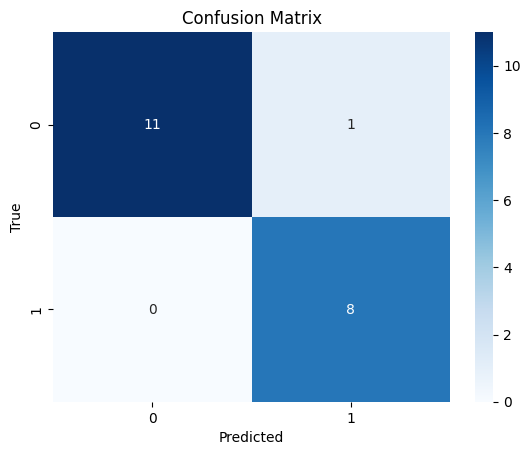

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
# 5. Confusion Matrix dan Classification Report
matrix = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 6. Classification Report
print(classification_report(y_test_encoded, y_pred))


In [ ]:
import pickle


In [ ]:
# 1. Menyimpan TF-IDF Vectorizer
with open('tfidf_vectorizer.sav', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# 2. Menyimpan SVD Model (TruncatedSVD)
with open('svd_model.sav', 'wb') as f:
    pickle.dump(svd, f)

# 3. Menyimpan Logistic Regression Model
with open('lr_model.sav', 'wb') as f:
    pickle.dump(lr_model, f)
